In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore')

In [3]:
avocado_mean = pd.read_csv("avocado_mean.csv",
                           index_col=0, parse_dates=['Date'])

Проанализируем данные

In [4]:
avocado_mean

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037
...,...
2018-02-25,1.359630
2018-03-04,1.350185
2018-03-11,1.335093


In [5]:
avocado_mean.dtypes

AveragePrice    float64
dtype: object

In [6]:
avocado_mean.isna().sum()

AveragePrice    0
dtype: int64

Посчитаем скользящее среднее цены авокадо (AveragePrice) с окном равным 3.
Узнаем чему равно максимальное значение

In [7]:
roll_mean = avocado_mean.rolling(3).mean()
roll_mean

,AveragePrice
Date,
2015-01-04,NaN
2015-01-11,NaN
2015-01-18,1.354352
2015-01-25,1.386296
2015-02-01,1.345093
...,...
2018-02-25,1.346914
2018-03-04,1.361296
2018-03-11,1.348302


Построим графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50)


<AxesSubplot:xlabel='Date'>

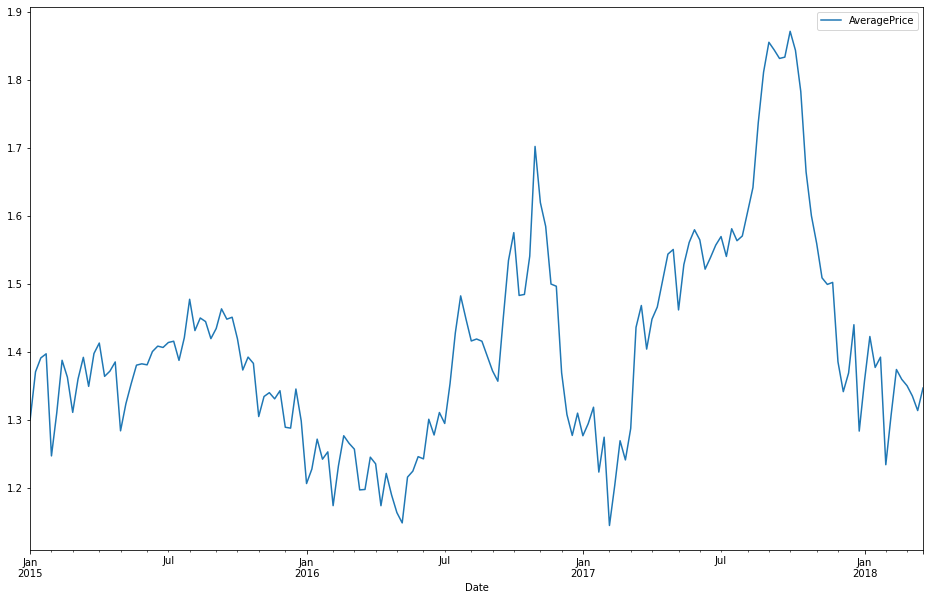

In [8]:
# Посмотрим на график цены
avocado_mean.plot(figsize=(16,10))

Используем цикл что бы пройтись по всем значением окна window (2, 4, 10, 50)

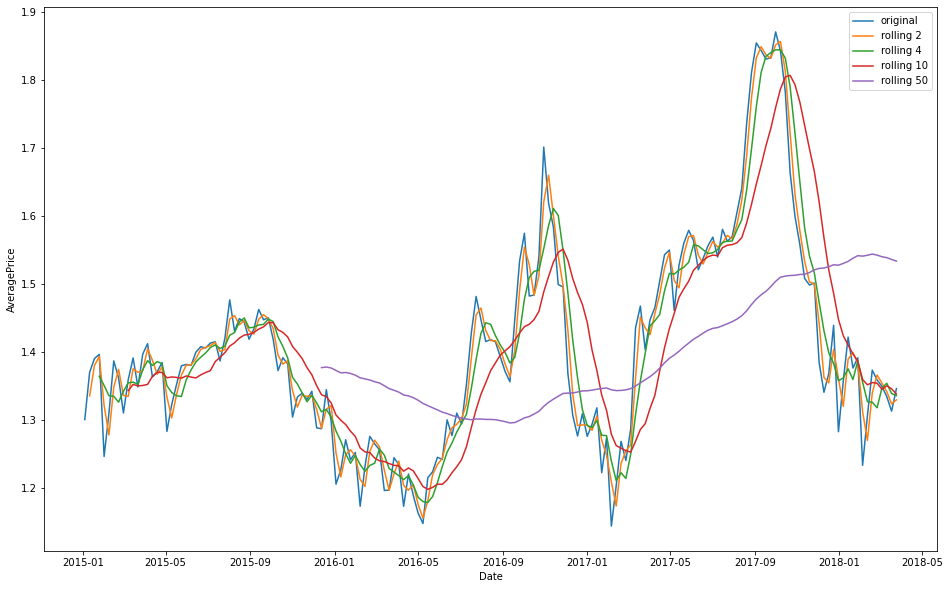

In [9]:
windows = [2, 4, 10, 50]
plt.figure(figsize=(16, 10))
sns.lineplot(x=avocado_mean.index, y=avocado_mean.AveragePrice, label='original')
for window in windows:
    tdf = avocado_mean.rolling(window).mean()
    sns.lineplot(x=tdf.index, y=tdf.AveragePrice, label=f'rolling {window}')
    
    

Используем агрегированные данные avocado_mean.csv о ценах на авокадо и применим функцию ewm() 
с параметром span=2, чтобы получить экспоненциальное скользящее среднее

In [10]:
avocado_ewm = avocado_mean.ewm(span=2).mean()
avocado_ewm

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.353310
2015-01-18,1.379480
2015-01-25,1.391394
2015-02-01,1.294758
...,...
2018-02-25,1.356212
2018-03-04,1.352194
2018-03-11,1.340793


Посмотрим на графики скользящего среднего и экспоненциального скользящего среднего


<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

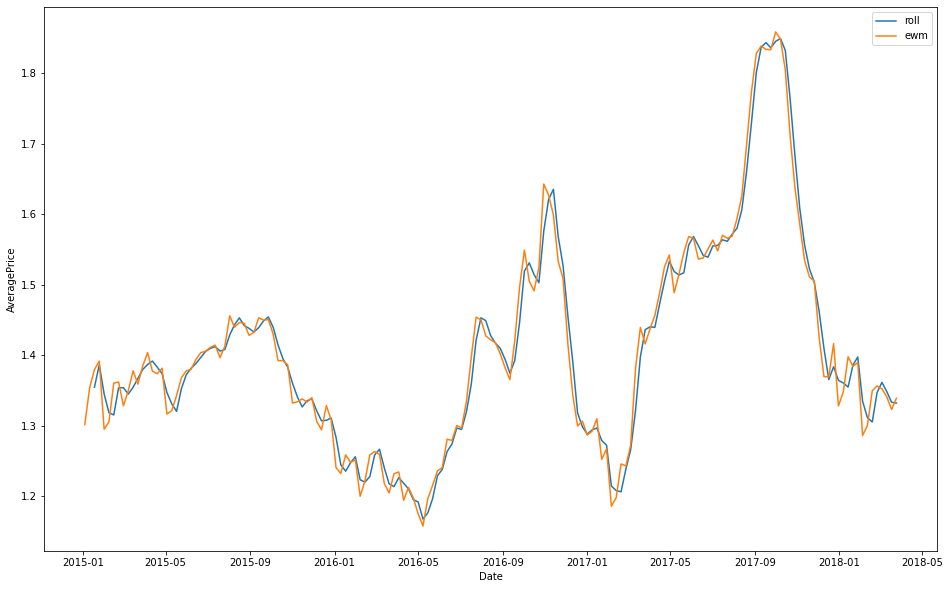

In [11]:
plt.figure(figsize=(16,10))
sns.lineplot(x=roll_mean.index, y=roll_mean.AveragePrice, label='roll')
sns.lineplot(x=avocado_ewm.index, y=avocado_ewm.AveragePrice, label='ewm')

 График скользящего среднего выглядит более сглаженным

Импортируем полные данные (avocado_full.csv)
Для авокадо типа organic (type) в Чикаго (region) посчитаем скользящее среднее с окном 4 
и экспоненциальное скользящее среднее с параметром 4. 



In [14]:
avocado_full = pd.read_csv('avocado_full.csv', index_col=0)

In [15]:
avocado_full

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [16]:
avo_organic = avocado_full.query('type == "organic"  and region == "Chicago"')

In [21]:
avo_organic_roll = avo_organic.AveragePrice.rolling(window=4).mean().round(3) \
    .reset_index()

avo_organic_roll


,Date,AveragePrice
0,2015-01-04,NaN
1,2015-01-11,NaN
2,2015-01-18,NaN
3,2015-01-25,1.730
4,2015-02-01,1.738
...,...,...
164,2018-02-25,1.652
165,2018-03-04,1.652
166,2018-03-11,1.655
167,2018-03-18,1.655


In [22]:
# или через создание колонок
avo_organic['rolling'] = avo_organic.AveragePrice.rolling(4).mean().round(3)

In [23]:
avo_organic

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,rolling
Date,,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago,NaN
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago,NaN
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago,NaN
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago,1.730
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago,1.738
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago,1.652
2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago,1.652
2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago,1.655


In [24]:
avo_organic['ewm'] = avo_organic.AveragePrice.ewm(4).mean()

Построим графики и посмотрим какие цены были в каждый из дней

<AxesSubplot:xlabel='Date'>

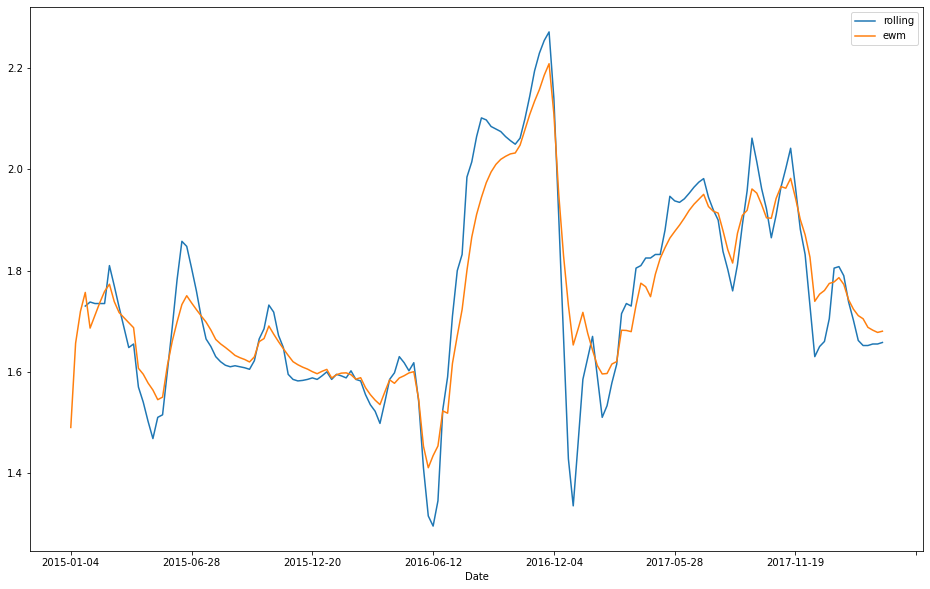

In [28]:
avo_organic[['rolling', 'ewm']].plot(figsize=(16, 10))

Посмотрим какие скользящие средние были 21.08.2016( можно взять целый срез) 


In [30]:
avo_organic.loc['2016-08-21':'2018-03-18', ['rolling', 'ewm']]

,rolling,ewm
Date,,
2016-08-21,2.102,1.944844
2016-08-28,2.098,1.973875
2016-09-04,2.085,1.995100
2016-09-11,2.080,2.010080
2016-09-18,2.075,2.020064
...,...,...
2018-02-18,1.662,1.711105
2018-02-25,1.652,1.704884
2018-03-04,1.652,1.687907


В файле delays находится информация о том какие компании с кем и на какую сумму заключали сделки,
и насколько они при этом опоздали 

In [32]:
delays = pd.read_csv('delays.csv')
delays

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,-0 days -05:32:08.000000000,602129
260,2384,2364,-3 days -23:27:14.000000000,910660
261,5146,3331,-1 days -15:22:34.000000000,401137
262,7203,5532,-2 days -17:15:02.000000000,308979


Переведём delay в timedelta формат

In [33]:
delays['delay'] = pd.to_timedelta(delays.delay.str.replace('-', ' '))

Разделим время на 3 интервала


In [34]:
delays['delay_categorical'] = pd.cut(delays.delay, bins=3)

In [35]:
delays

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
260,2384,2364,3 days 23:27:14,910660,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
261,5146,3331,1 days 15:22:34,401137,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
262,7203,5532,2 days 17:15:02,308979,"(1 days 16:19:58.666666666, 3 days 08:05:36.33..."


Создадим 4 категории для данных интервалов


In [36]:
pd.to_timedelta('2d')

Timedelta('2 days 00:00:00')

In [37]:
bins = [pd.to_timedelta('0d'),
        pd.to_timedelta('1d'),
        pd.to_timedelta('2d'),
        pd.to_timedelta('3d'),
        pd.to_timedelta('100d')]

In [38]:
labels = ['less than 1 day',
          '1-2 days',
          '2-3 days',
          'more than 3 days']

In [39]:
delays['delay_categorical'] = pd.cut(delays.delay, bins=bins, labels=labels)

In [40]:
delays

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


Теперь построим интерактивный барплот с тем, насколько часто задерживаются сделки,
выясним самый редкий и самый частый варианты

In [42]:
f = delays.groupby('delay_categorical', as_index=False) \
          .agg({'company_id': 'count'}) \
          .rename(columns={'company_id': 'quantity'})

f

,delay_categorical,quantity
0,less than 1 day,59
1,1-2 days,51
2,2-3 days,47
3,more than 3 days,107


<AxesSubplot:xlabel='delay_categorical', ylabel='quantity'>

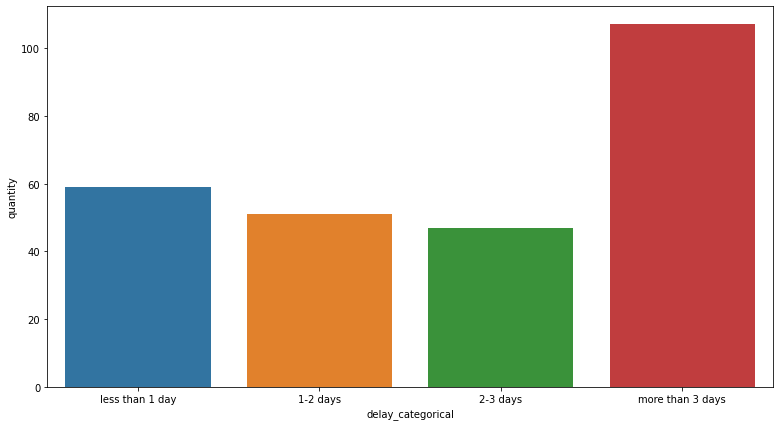

In [45]:
plt.figure(figsize=(13,7))
sns.barplot(data=f, x='delay_categorical', y='quantity')